### 1. Use Euler’s method to approximate the solutions for each of the following initial-value problems.
### AND
### 2. The actual solutions to the initial-value problems above are given here. Compare the actual error at each step to the error bound.

Error:  [ 0.         11.39381321]
[0.         0.         1.12042227] 

Error:  [0.         0.03550318 0.08109016 0.139625  ]
[2.         2.75       3.55       4.39166667 5.26904762]


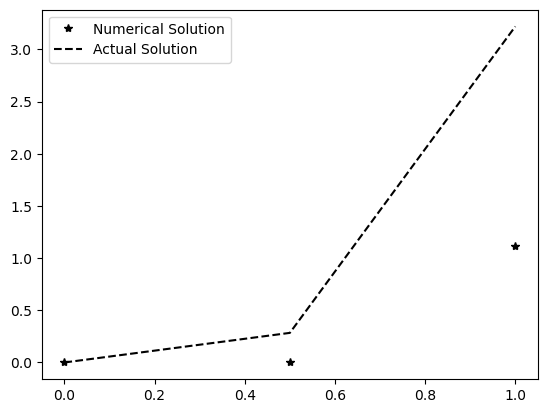

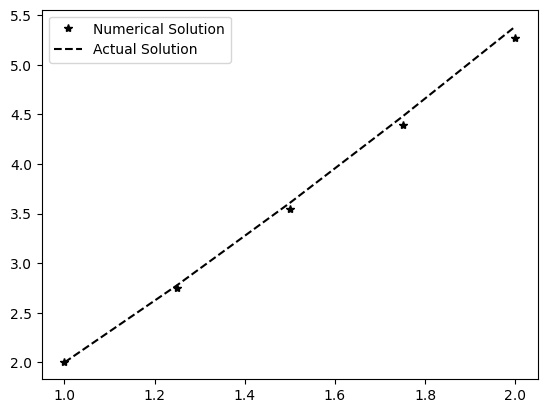

In [9]:
import numpy as np
import matplotlib.pyplot as plt
def Euler(f,f_act,a,b,alp,h,L,M):
    #n is the number of iterations, w is the array of values, and t is the intervals
    n=int((b-a)/h)
    w=np.zeros([n+1])
    w[0]=alp
    t=np.arange(a,b+h,h)
    err=np.zeros([n])
    y_act = np.array([f_act(x_i) for x_i in t])
    for i in range(n):
        w[i+1]=w[i]+h*f(t[i],w[i])
        #Error Bound
        err[i]=((h*M/(2*L))*(np.exp(L*(t[i]-a))-1))
    print("Error: ",err)
    plt.plot(t,w,"*",color="k",label="Numerical Solution")
    plt.plot(t,y_act,"--",color="k",label="Actual Solution")
    plt.legend()
    return w

f_act=lambda t: (1/5)*t*np.exp(3*t)-(1/25)*np.exp(3*t)+(1/25)*np.exp(-2*t)
f=lambda t,y: t*np.exp(3*t)-2*y
yp=lambda t: (9/5)*t*np.exp(3*t)+(21/25)*np.exp(3*t)+(4/25)*np.exp(-2*t)
L=2 #The absolute value of the partial perivative of the estimated function is 2 
M=abs(yp(1)) #M is the largest value of the 2nd derivative of the actual function
ye=Euler(f,f_act,0,1,0,0.5,L,M)
print(ye,"\n")

plt.figure()
g_act=lambda t: t*np.log(t)+2*t
g=lambda t,y: 1+y/t
gpp= lambda t: 1/t
L1=1 #Take partial derivative with respect to y and substitue 1 for t to get 1.
M1=abs(gpp(1)) #Largest value of the second derivative of the actual function
ye1=Euler(g,g_act,1,2,2,0.25,L1,M1)
print(ye1)

### 3. Repeat Exercises 1 and 2 (a) using Taylor’s method of order 2

Error:  [0.10416667 0.61786833]
[0.         0.125      2.02323897]


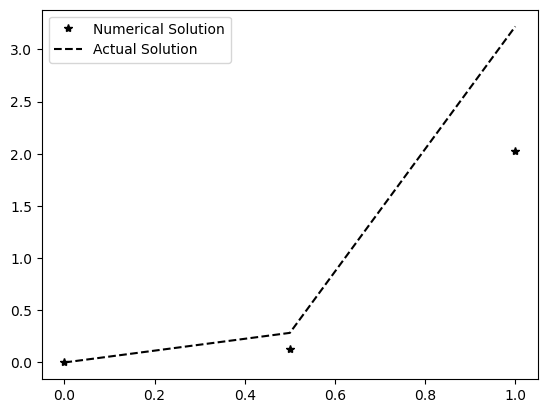

In [10]:
import math
def Taylor2(f,f_act,fp,yp3,a,b,alp,h):
    n=int((b-a)/h)
    w=np.zeros([n+1])
    w[0]=alp
    t=np.arange(a,b+h,h)
    err=np.zeros([n])
    y_act = np.array([f_act(x_i) for x_i in t])
    T=0
    for i in range(n):
        T=f(t[i],w[i])+(h/2)*fp(t[i],w[i],f)
        w[i+1]=w[i]+h*T
        err[i]=(1/math.factorial(n+1))*yp3(t[i])*h**(n+1)
    plt.plot(t,w,"*",color="k",label="Numerical Solution")
    plt.plot(t,y_act,"--",color="k",label="Actual Solution")
    plt.legend()
    print("Error: ", err)
    return w

yp3=lambda t:(27/5)**t*np.exp(3*t)+(108/25)*np.exp(3*t)-(8/25)*np.exp(-2*t)
def fp(t,y,f):
    return np.exp(3*t)+3*t*np.exp(3*t)-2*f(t,y)
print(Taylor2(f,f_act,fp,yp3,0,1,0,0.5))        

### 4. Repeat Exercises 1 and 2 (b) using the Runge-Kutta method of order 4.

Error:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.30257164e-05
 0.00000000e+00] 

[2.         2.77890947 3.60816473 4.4792846  5.38624259]


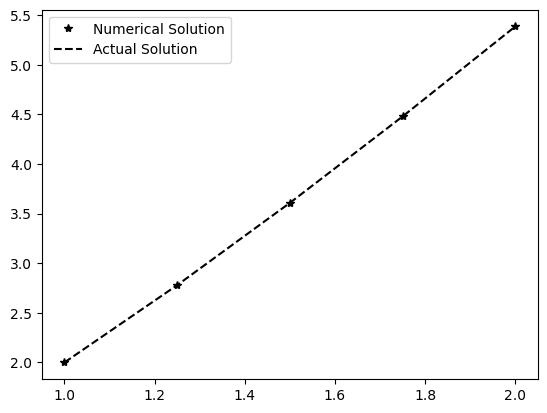

In [11]:
def RK4(f,f_act,a,b,alp,h):
    n=int((b-a)/h)
    w=np.zeros([n+1])
    t=np.arange(a,b+h,h)
    w[0]=alp
    y_act = np.array([f_act(x_i) for x_i in t])
    err=np.zeros([n+1])
    for i in range(n):
        k1=h*f(t[i],w[i])
        k2=h*f(t[i]+h/2,w[i]+k1/2)
        k3=h*f(t[i]+h/2,w[i]+k2/2)
        k4=h*f(t[i+1],w[i]+k3)
        w[i+1]=w[i]+(k1+2*k2+2*k3+k4)/6
    plt.plot(t,w,"*",color="k",label="Numerical Solution")
    plt.plot(t,y_act,"--",color="k",label="Actual Solution")
    plt.legend()
    err[i]=abs(y_act[i]-w[i])
    print("Error: ", err,"\n")
    return w


print(RK4(g,g_act,1,2,2,0.25))

### 5. Use the Runge-Kutta method for systems to approximate the solution of the following higher-order differential equation and compare the results to the actual solution.

Error:  [0.00000000e+00 3.29451225e-08 1.77537203e-08 6.91634079e-08
 2.58199927e-07 5.88103066e-07 1.10782921e-06 1.87876119e-06
 2.97735167e-06 4.49826791e-06 0.00000000e+00] 

[[0.00000000e+00 0.00000000e+00]
 [8.97244187e-06 3.63919772e-04]
 [1.53519453e-04 3.17882216e-03]
 [8.34268350e-04 1.17190853e-02]
 [2.83205480e-03 3.03532534e-02]
 [7.42967775e-03 6.47983882e-02]
 [1.65614895e-02 1.22423745e-01]
 [3.29961707e-02 2.12612330e-01]
 [6.05589627e-02 3.47190281e-01]
 [1.04400702e-01 5.40935589e-01]
 [1.71322242e-01 8.12179520e-01]]


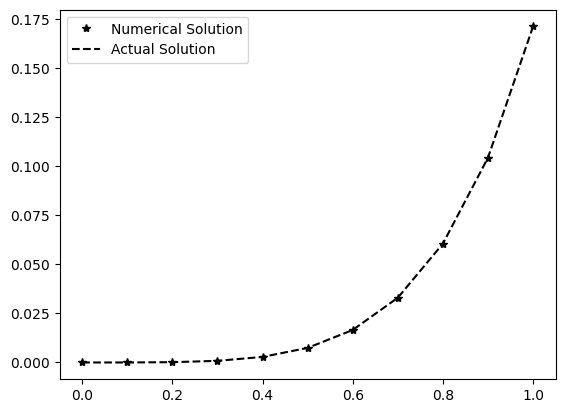

In [12]:
import matplotlib.pyplot as plt
def runge_kutta(f,f_act, a, b, alp1, alp2, h):
    n = int((b-a)/h)
    t=np.arange(a,b+h,h)
    y = np.zeros([n+1,2])
    y[0] = alp1
    y_act = np.array([f_act(x_i) for x_i in t])
    err=np.zeros([n+1])
    for i in range(n):
        k1 = h * y[i,1]
        l1 = h * f(t[i], y[i,0], y[i,1])
        k2 = h * (y[i,1]+ 0.5*l1)
        l2 = h * f(t[i] + 0.5*h, y[i,0] + 0.5*k1, y[i,1] + 0.5*l1)
        k3 = h * (y[i,1] + 0.5*l2)
        l3 = h * f(t[i] + 0.5*h, y[i,0] + 0.5*k2, y[i,1] + 0.5*l2)
        k4 = h * (y[i,1] + l3)
        l4 = h * f(t[i] + h, y[i,0] + k3, y[i,1] + l3)
        
        y[i+1,1] = y[i,1] + (1/6) * (l1 + 2*l2 + 2*l3 + l4)
        y[i+1,0] = y[i,0] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        err[i]=abs(y_act[i]-y[i,0])
        
    plt.plot(t,y[:,0],'*',color='k',label='Numerical Solution')   
    plt.plot(t,y_act,'--',color='k',label='Actual Solution')
    plt.legend()
    print("Error: ", err,"\n")
    return y

f= lambda t,u1,u2: t*np.exp(t)-t+2*u2-u1
f_act= lambda t: (1/6)*t**3*np.exp(t)-t*np.exp(t)+2*np.exp(t)-t-2
a=0
b=1
alp1=0
alp2=0
h=0.1
print(runge_kutta(f,f_act,a,b,alp1,alp2,h))